In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
import matplotlib
import seaborn
seaborn.set(style="dark")
rcParams['figure.figsize'] = (16, 5)

In [11]:
from IPython.display import Audio

In [12]:
import numpy as np
import librosa
import librosa.display
import pysptk
from scipy.io import wavfile

In [13]:
sr, x = wavfile.read(pysptk.util.example_audio_file())
assert sr == 16000
print(x.shape)

(64000,)


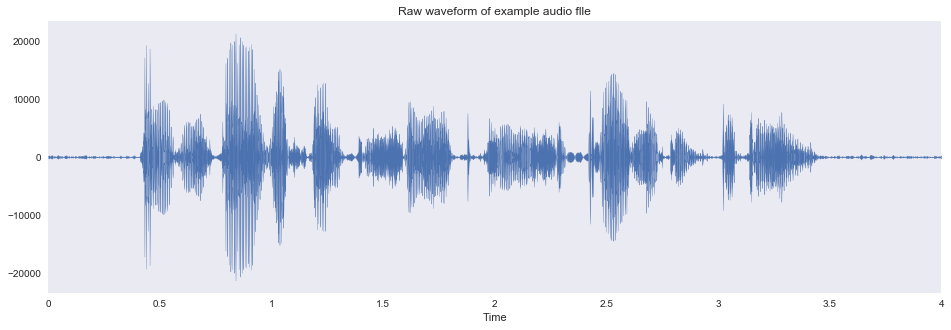

In [14]:
librosa.display.waveplot(x, sr=sr)
title("Raw waveform of example audio flle")
Audio(x, rate=sr)

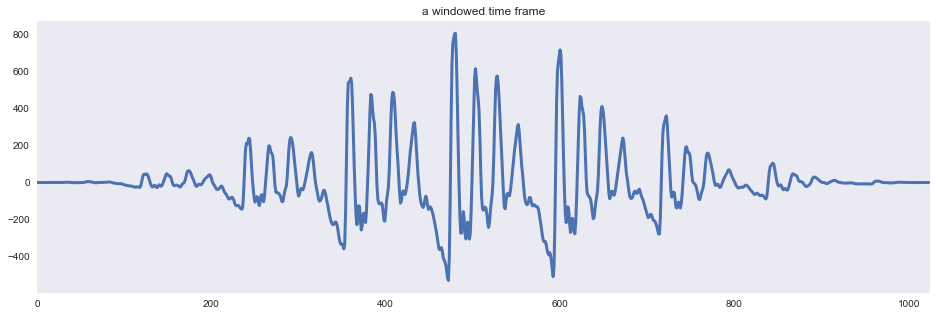

In [15]:
# Pick a short segment
pos = 40000
frame_length = 1024

xw = x[pos:pos+frame_length] * pysptk.blackman(frame_length)

plot(xw, linewidth=3.0)
xlim(0, frame_length)
title("a windowed time frame")

In [16]:
# plotting utility
def pplot(sp, envelope, title="no title"):
    plot(sp, "b-", linewidth=2.0, label="Original log spectrum 20log|X(w)|")
    plot(20.0/np.log(10)*envelope, "r-", linewidth=3.0, label=title)
    xlim(0, len(sp))
    xlabel("frequency bin")
    ylabel("log amplitude")
    legend(prop={'size': 20})

In [17]:
# Compute spectrum 20log|X(w)| for a windowed signal
sp = 20*np.log10(np.abs(np.fft.rfft(xw)))

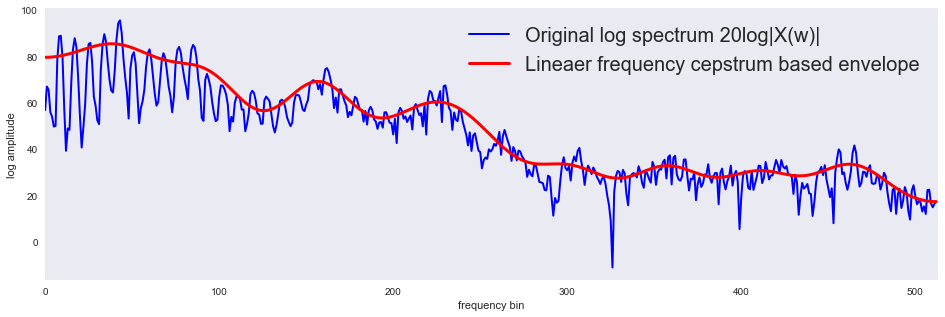

In [18]:
mgc = pysptk.mgcep(xw, 20, 0.0, 0.0)
pplot(sp, pysptk.mgc2sp(mgc, 0.0, 0.0, frame_length).real, title="Lineaer frequency cepstrum based envelope")